Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Jingren Wang"
COLLABORATORS = "N.A."

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

<br>
The partition process starts by picking the last element of the array A as the 'pivot', to be compared against rest of elements to the left. Here the pivot is 7.

the index i holds the position of currently right-most element LESS than the pivot value, as j compares every element to the left of pivot. here, i starts at -1.
if A[j] is less than or equal to the pivot, increment i and swap A[i], A[j]: 

1st as i = 0 and j = 0, A[j] = 1 < 7, so we update i to 1, and swap A[1]=5 with A[j]=1, next j goes to 1, we evaluate new A[j]=1

Eventually, the **array after the partition process would be
[1, 5, 6, 2, 3, 4, 9, 8, 7]**; 

and the **value of i after the process is 5**

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [123]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0 
    """
    x = A[r]
    i = p-1   # start at i= -1
    for j in range(p, r): # j = p,...r-1
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j],A[i] # bring A[j] to the LESS-than-pivot subarray
   
    A[i+1],A[r] = A[r], A[i+1] # bring x to 'home', i+1 position
                # such that everything in A[: i] is LESS than x, and
                # and every element in A[i+2: ] is MORE than x
    
    return i+1
    
    

In [124]:
A = [3,1,2]
q = partition(A, 0, len(A)-1)
A 

[1, 2, 3]

In [125]:
A = [1,5,6,2,3,8,9,4,7]
q = partition(A, 0, len(A)-1)
print('array after partition: ',A)
print('pivot index =', q)

array after partition:  [1, 5, 6, 2, 3, 4, 7, 8, 9]
pivot index = 6


In [126]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [130]:
def quick_sort(A,p,r):
    if p < r: 
        q = partition(A,p,r)  # return the pivot index
        quick_sort(A,p, q-1)  # subdision of LESS-than-pivot subarray
        quick_sort(A,q+1, r)  # subdision of MORE-than-pivot subarray
    
    # no need to COMBINE, entire A sorted once base-level reached
    return A  # return the sorted array

In [131]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]


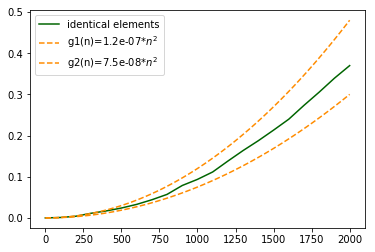

In [211]:
from matplotlib import pyplot as plt
import numpy as np
import time 

# x-axis data
Ns = [100*a for a in range(21)]
print(Ns)

# y-axis data
## case 1: array of same value
identicalList = []
for N in Ns:
    A = [1]*N
    start_time = time.clock()
    quick_sort(A,0,len(A)-1)
    identicalList.append(time.clock()-start_time)

    
# plotting
plt.plot(Ns,identicalList, color='darkgreen',label='identical elements')
x = np.linspace(1,2000, 100)
c_upr = 1.2e-7
c_lwr = 7.5e-8
plt.plot(x, c_upr*x**2, '--', color='darkorange', label=f'g1(n)={c_upr}*$n^2$' )
plt.plot(x, c_lwr*x**2, '--', color='darkorange', label=f'g2(n)={c_lwr}*$n^2$' )
plt.legend()
plt.show()


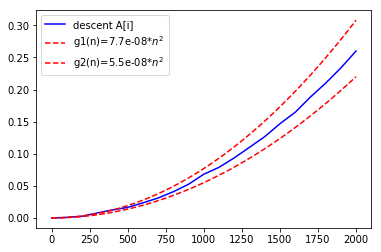

In [212]:
## case 2: strict descent array (worst case)
descentList = []
for N in Ns:
    A = list(range(N,0,-1))
    start_time = time.clock()
    quick_sort(A,0,len(A)-1)
    descentList.append(time.clock()-start_time)
    

# plotting
plt.plot(Ns,descentList,color='blue', label='descent A[i]')
x = np.linspace(1,2000, 100)
c_upr = 7.7e-8
c_lwr = 5.5e-8
plt.plot(x, c_upr*x**2, '--', color='red', label=f'g1(n)={c_upr}*$n^2$' )
plt.plot(x, c_lwr*x**2, '--', color='red', label=f'g2(n)={c_lwr}*$n^2$' )
plt.legend()
plt.show()


From runtime plot above, we can see that both cases run at $\theta(n^2)$ experimentally,as we can always find two constants $c_l$ and $c_u$ such that $c_l*n^2$ <= $T(n)$ <= $c_u*n^2$ for some positive n_0 <br>
which makes sense as every partition results in an extremely skewed binary tree of an empty list and A[:p-1], at a cost of $\theta$(n), thus, the recursive relationship is T(n) = T(n-1)+ T(0) + $\theta$(n) = T(n-1) + $\theta$(n). Sum of T(n) to T(1) amounts to n(n-1)/2 ~ $\theta(n^2)$